  # ****CLUSTERING****




Clustering in simple terms means grouping of similar point together into clusters

It is an unsupervised ML task.  

 **Applications of Clustering**
- Segregating and targeting customers based on their Spending trends(which we will be doing in this exercise)  
- Identifying cancer cells by classifying them against healthy cells
- Hashtags in Social media to classify hashtags under different heads
- Image recognition techniques, etc.

In [453]:
X

,Age,Income,Score,labels_KMeans,labels_HC,labels_DBSCAN
0,19,15,39,3,4,0
1,21,15,81,1,3,0
2,20,16,6,3,4,0
3,23,16,77,1,3,0
4,31,17,40,3,4,0
...,...,...,...,...,...,...
195,35,120,79,4,2,0
196,45,126,28,2,1,0
197,32,126,74,4,2,0
198,32,137,18,2,1,0


In [466]:
X.iloc[np.where(X['Age'] == max(X['Age']))]

,Age,Income,Score,labels_KMeans,labels_HC,labels_DBSCAN
60,70,46,56,0,0,0
70,70,49,55,0,0,0


In [2]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import os
import warnings

warnings.filterwarnings('ignore')


In [3]:
pwd

'C:\\Users\\Hp'

In [3]:

os.chdir('C:\\Users\\Hp\\Desktop\\Applied AI\\Kaggle\\Clustering Project')

In [4]:
pwd

'C:\\Users\\Hp\\Desktop\\Applied AI\\Kaggle\\Clustering Project'

In [5]:
df=pd.read_csv('Mall_Customers.csv')

## EDA

In [145]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Shape of your Data Set: (200, 5)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  3
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of Date Time Columns =  0
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    5 Predictors classified...
        This does not include the Target column(s)
        1 variables removed since they were ID or low-information variables
Number of All Scatter Plots = 6


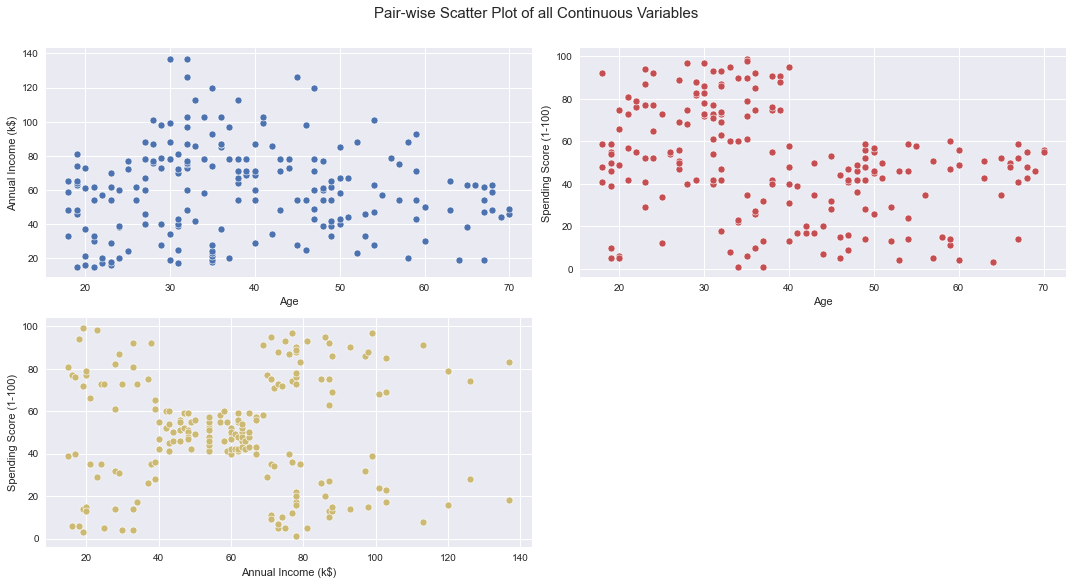

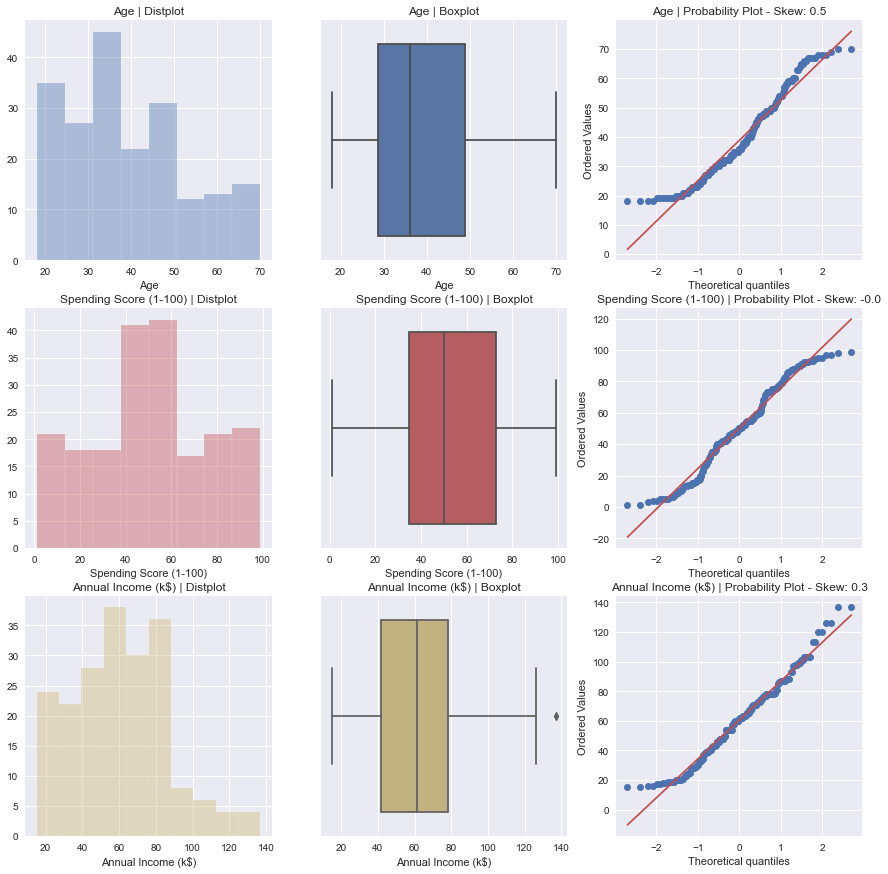

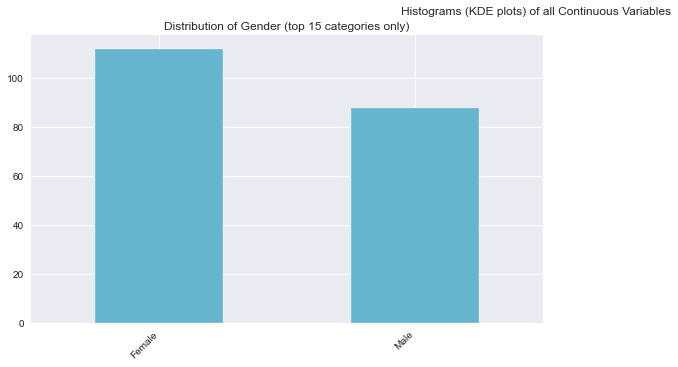

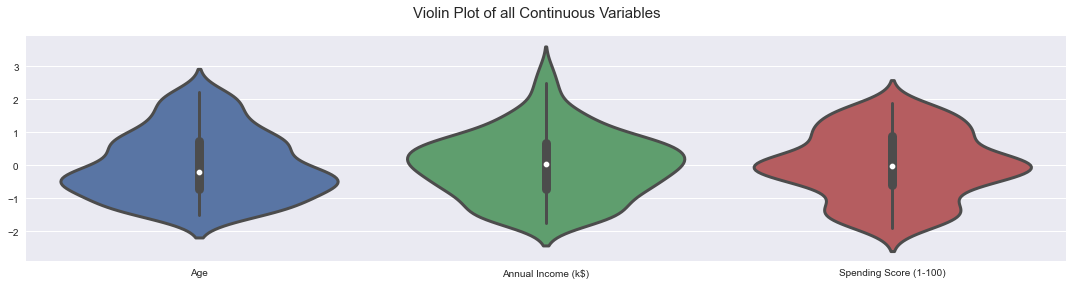

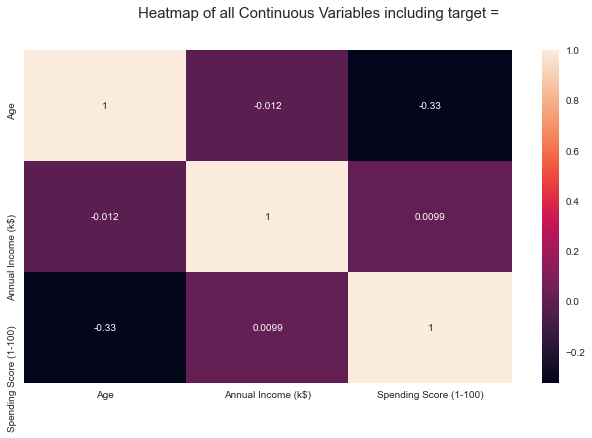

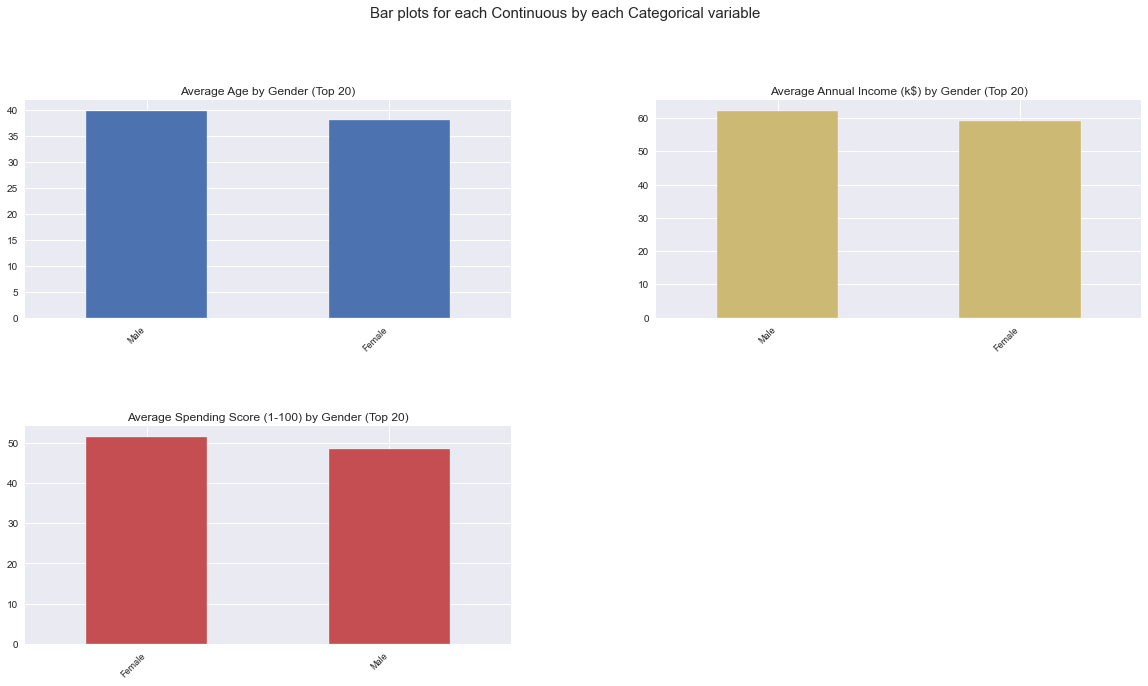

Time to run AutoViz (in seconds) = 6.811

 ###################### VISUALIZATION Completed ########################


In [146]:

#importing Autoviz class
from autoviz.AutoViz_Class import AutoViz_Class
#Instantiate the AutoViz class
AV = AutoViz_Class()
auto = AV.AutoViz('Mall_Customers.csv')

In [147]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [188]:
df.columns = ['CustomerID','Gender','Age','Income','Score']

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


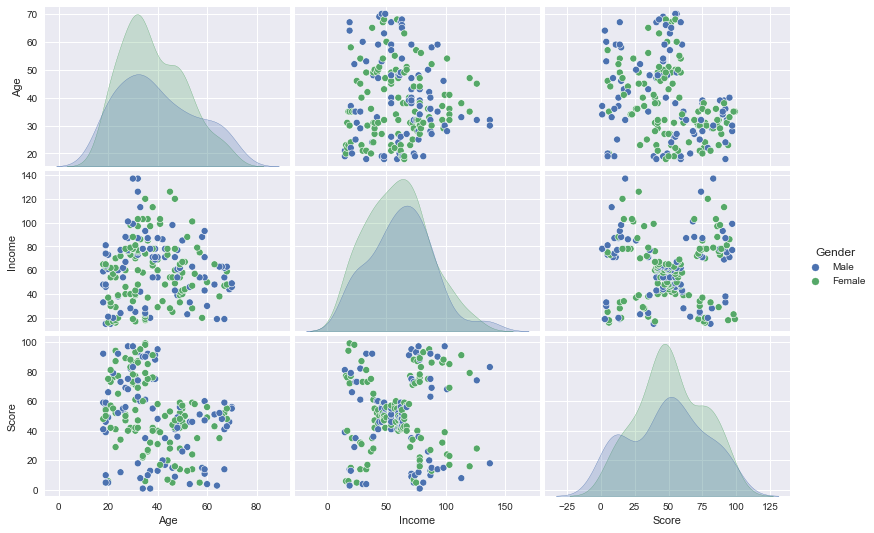

In [152]:
sns.pairplot(df.drop('CustomerID',axis=1),hue='Gender',aspect=1.5)

#### We can observe that Gender has no direct relation in segregating customers, hence can be dropped. 



In [190]:
X = df.drop(['CustomerID','Gender'],axis=1)  ## Dropping customerID as its unique for all.

In [191]:
X

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [353]:
y = X.copy()

In [355]:
y = y.iloc[:,:3]

In [356]:
y

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


#### Feature Scaling

In [172]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X = sc.fit_transform(X)

## StandardScaler did not perform well. Clusters with SC were worse than that on unscaled data.

In [357]:
scaler = StandardScaler()

y = scaler.fit_transform(y)

In [368]:
y=pd.DataFrame(y,columns=X.columns[:3])

In [176]:
# from sklearn.preprocessing import MinMaxScaler
# mc = MinMaxScaler()
# X = mc.fit_transform(X)

Scaling the features did not give good clusters. So, will use unscaled data only.

In [193]:
X = pd.DataFrame(X, columns=['Age','Income','Score'])

In [194]:
from sklearn.cluster import KMeans

In [195]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1,11):
    km = KMeans(n_clusters=i,init = 'k-means++').fit(X)
    clusters.append(km.inertia_)

In [381]:
y.iloc[:,:3]

,Age,Income,Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [382]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1,11):
    km = KMeans(n_clusters=i,init = 'k-means++').fit(y.iloc[:,:3])
    clusters.append(km.inertia_)

Here we are making clusters from 1 to 10 and recording their Inertia score. 

WCSS/Inertia is the Sum of squared distances of samples to their closest cluster center

It shows how well a dataset was clustered by K-Means.

I= ∑ i (d(i,cr))

cr =  centroid of the assigned cluster 

d = squared distance.

In [196]:
clusters

[308812.7800000001,
 212840.16982097193,
 143342.75157170597,
 104366.151455562,
 75363.74835182933,
 58300.443321590676,
 51116.98694463434,
 44344.949801777206,
 41678.90653943756,
 37836.02336021371]

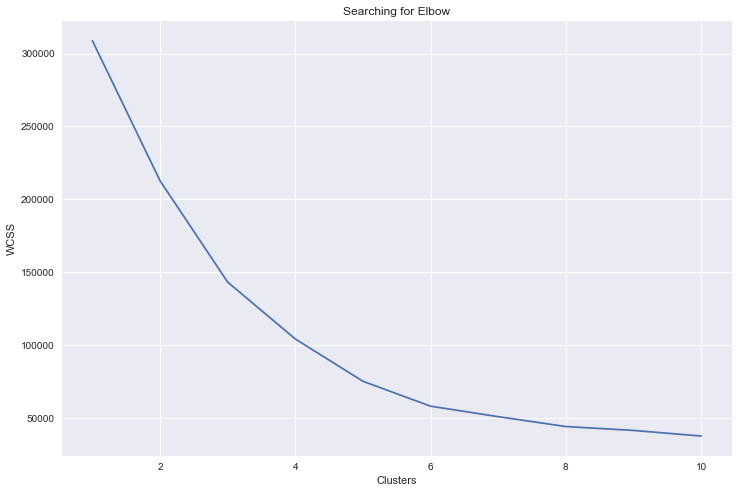

In [197]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('WCSS')
plt.show()


Elbow method tells us to select the cluster when there is a significant change in WCSS. 

As we can see from the graph, we can say this may be either 3,5 or 6. 

Let's see all results in graph and decide.

### For k = 3

In [198]:
km3 = KMeans(n_clusters = 3).fit(X)
X['labels_KMeans'] = km3.labels_

In [388]:
km3 = KMeans(n_clusters = 3).fit(y.iloc[:,:3])


In [389]:
km3

KMeans(n_clusters=3)

In [390]:
km3.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       2, 2])

In [391]:
y['labels_KMeans'] = km3.labels_

In [379]:
X.head()

,Age,Income,Score,labels_KMeans,labels_HC,labels_DBSCAN
0,19,15,39,3,4,0
1,21,15,81,1,3,0
2,20,16,6,3,4,0
3,23,16,77,1,3,0
4,31,17,40,3,4,0


In [394]:
x = X.iloc[:,:3]

In [395]:
x

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [396]:
y = x.copy()

In [398]:
sc = StandardScaler()   ## only y has been scaled
y = sc.fit_transform(y)

In [401]:
y = pd.DataFrame(y,columns = x.columns)


In [403]:
y.head()

,Age,Income,Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


In [404]:
km3_x = KMeans(n_clusters = 3).fit(x)
x['labels_KMeans_x'] = km3_x.labels_

In [405]:
km3_y = KMeans(n_clusters = 3).fit(y)
y['labels_KMeans_y'] = km3_y.labels_

In [407]:
clust = pd.DataFrame({'unscaled':km3_x.labels_,'scaled':km3_y.labels_})

In [408]:
clust   ### Clusters not same

,unscaled,scaled
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
195,1,2
196,2,0
197,1,2
198,2,2


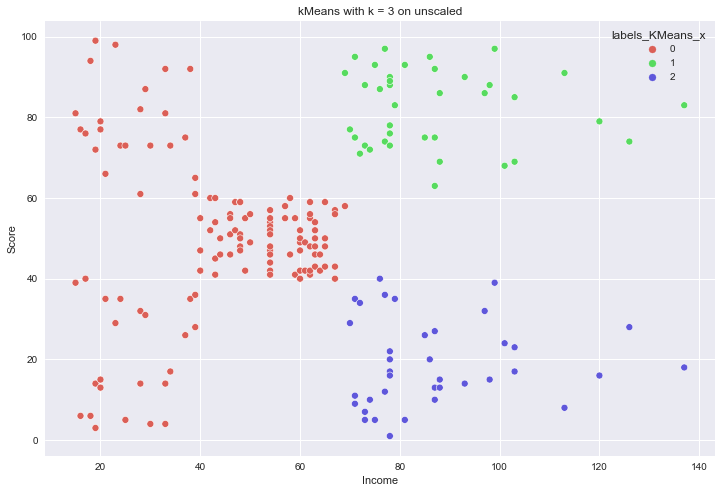

In [409]:
plt.figure(figsize=(12,8))
sns.scatterplot(x['Income'],x['Score'],hue=x['labels_KMeans_x'],palette=sns.color_palette('hls', 3))
plt.title('kMeans with k = 3 on unscaled')
plt.show()

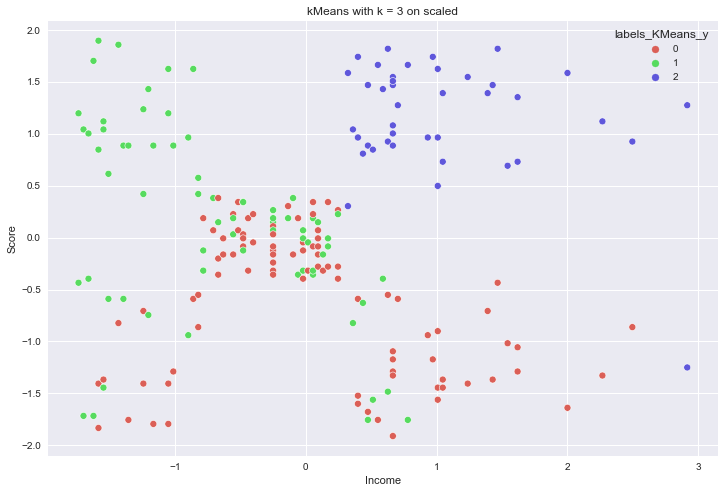

In [410]:
plt.figure(figsize=(12,8))
sns.scatterplot(y['Income'],y['Score'],hue=y['labels_KMeans_y'],palette=sns.color_palette('hls', 3))
plt.title('kMeans with k = 3 on scaled')
plt.show()

In [416]:
sil_score_x = silhouette_score(x.iloc[:,:3],km3_x.labels_)

In [417]:
sil_score_y = silhouette_score(y.iloc[:,:3],km3_y.labels_)

In [418]:
print(sil_score_x,sil_score_y)

0.3839349967742105 0.357793388710272


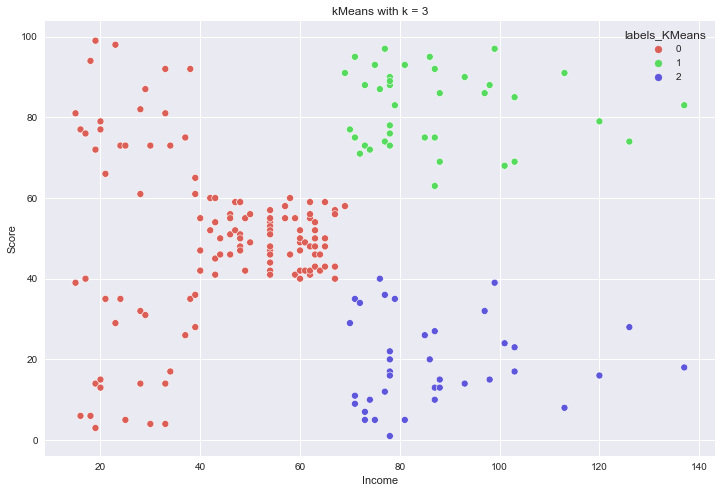

In [200]:
plt.figure(figsize=(12,8))
sns.scatterplot(X['Income'],X['Score'],hue=X['labels_KMeans'],palette=sns.color_palette('hls', 3))
plt.title('kMeans with k = 3')
plt.show()

In [387]:
y

,Age,Income,Score,labels_KMeans
0,-1.424569,-1.738999,-0.434801,0
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,2
196,0.441365,2.497807,-0.861839,1
197,-0.491602,2.497807,0.923953,2
198,-0.491602,2.917671,-1.250054,2


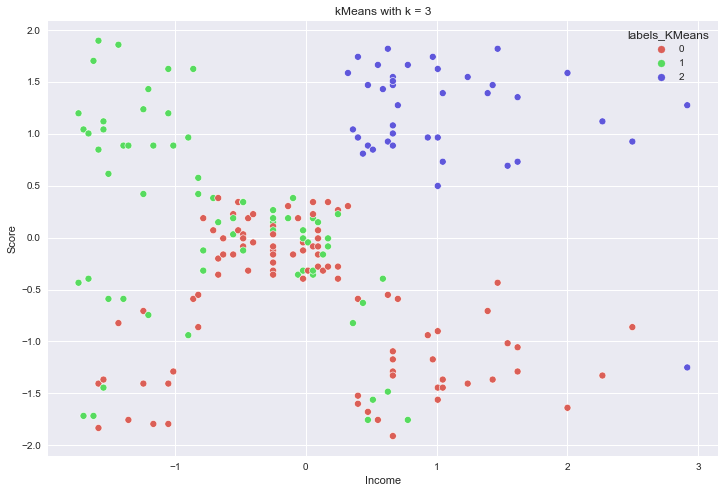

In [392]:
plt.figure(figsize=(12,8))
sns.scatterplot(y['Income'],y['Score'],hue=y['labels_KMeans'],palette=sns.color_palette('hls', 3))
plt.title('kMeans with k = 3')
plt.show()

### For k = 4

Text(0.5, 1.0, 'kMeans with k = 4')

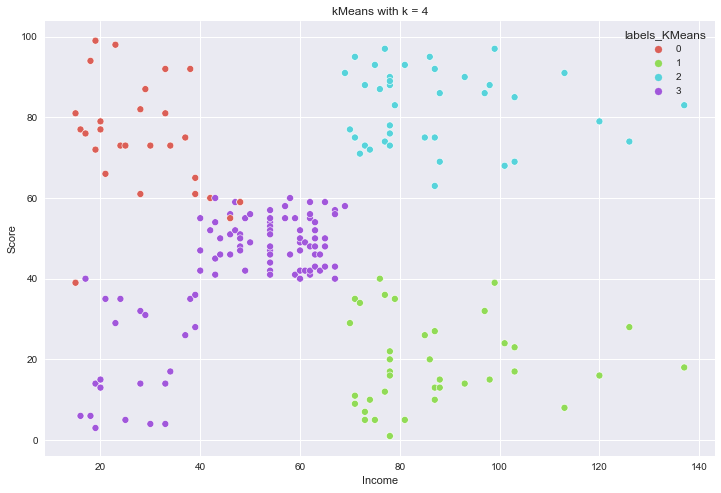

In [201]:
km3 = KMeans(n_clusters = 4).fit(X)
X['labels_KMeans'] = km3.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(X['Income'],X['Score'],hue=X['labels_KMeans'],palette=sns.color_palette('hls', 4))
plt.title('kMeans with k = 4')

### For k = 5

Text(0.5, 1.0, 'kMeans with k = 5')

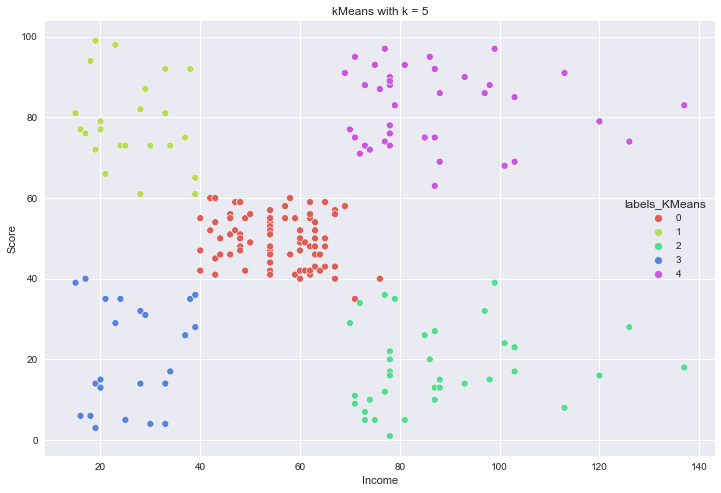

In [202]:
km3 = KMeans(n_clusters = 5).fit(X)
X['labels_KMeans'] = km3.labels_
plt.figure(figsize=(12,8))
sns.scatterplot(X['Income'],X['Score'],hue=X['labels_KMeans'],palette=sns.color_palette('hls', 5))
plt.title('kMeans with k = 5')

Observations:

We can observe that 5 clusters seems better than 3 or 4.

Now we can analyze further these 5 clusters

- Label 0 is mid income and mid spending

- Label 1 is low income and high spending

- Label 2 is high income and low spending

- Label 3 is low income and low spending

- Label 4 is high income and high spending

### Let's see our clusters with some plots

In [203]:
X

,Age,Income,Score,labels_KMeans
0,19,15,39,3
1,21,15,81,1
2,20,16,6,3
3,23,16,77,1
4,31,17,40,3
...,...,...,...,...
195,35,120,79,4
196,45,126,28,2
197,32,126,74,4
198,32,137,18,2


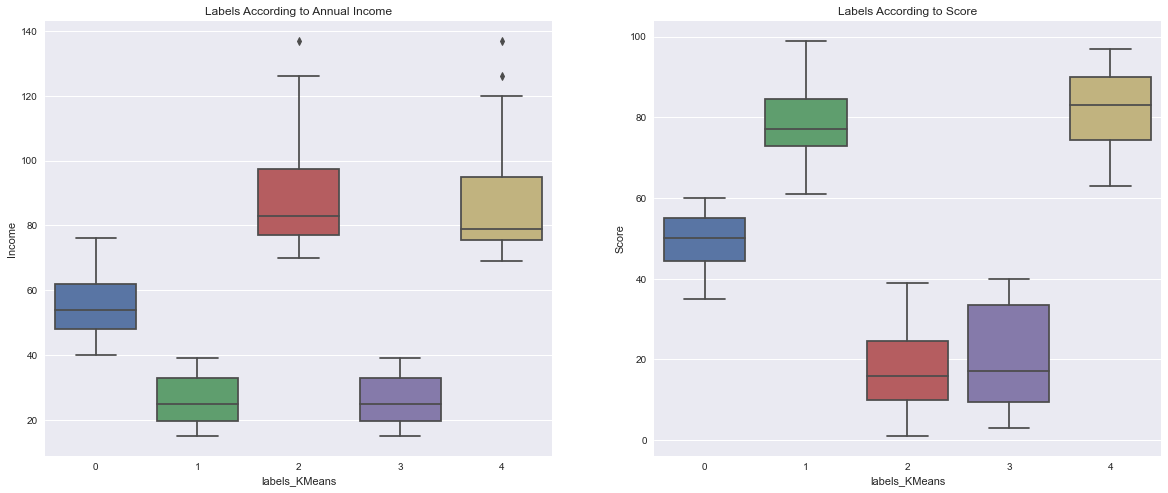

In [204]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(121)
sns.boxplot(x='labels_KMeans',y='Income',data=X) 
ax.set_title('Labels According to Annual Income')
ax = fig.add_subplot(122)
sns.boxplot(x='labels_KMeans',y='Score',data=X)
ax.set_title('Labels According to Score')
plt.show()

### Validation using Silhouette Score

In [205]:
def visualize_silhouette(cluster_lists, X_features): 

    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0, init = 'k-means++')
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
   
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

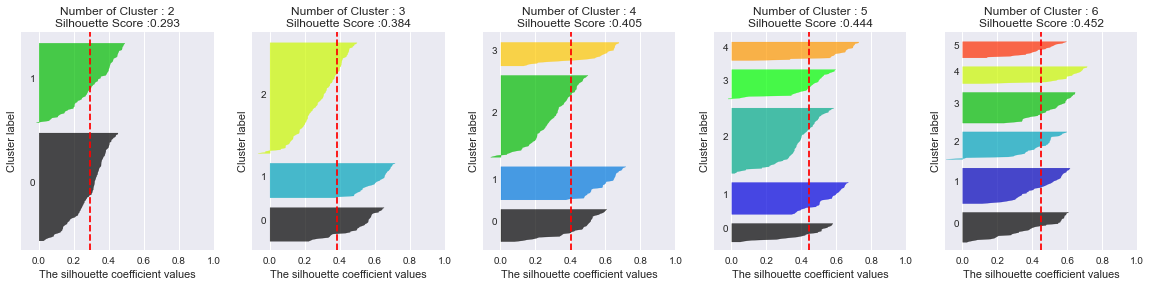

In [207]:
visualize_silhouette([2, 3, 4, 5, 6],X.iloc[:,:-1])

**Observations**
- On observing the Silhoute score, k=6 is the best, but some negative values for cluster 2 can be observed indicating improper clustering .
- Second best Silhoutte scores are at k=5. 
    - We can observe no negative values meaning proper segretation of points.

So, we can validate that k=5 is the best k for clustering this dataset
 

## Hierarchical Clustering

Hierarchical clustering is of 2 types:
- Agglomerative: Each point is considered as a cluster in the start. Based on some distance measures(linkages), clusters are merged together until we reach an optimal no. of clusters. Hence called 'Bottom Up Approach'.
- Divisive: All points are considered as a single cluster and we keep on dividing the large cluster until we reach an optimal no. of clusters. Hence called 'Top Down Approach'.
 
Agglomerative is more popular than Divisive clustering.

The Agglomerative Clustering class will require two inputs:

- n_clusters: The number of clusters to form. This can be found using dendograms: Cut the vertical bar wherever the distance -b/w any 2 horizontal bars is maximum. This can be va;llidated later using Silhoeutte Score as we did earlier. 
- linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize the chosen criterion from below:
    - Single-Linkage: Minimum distance b/w 2 closest points among 2 clusters
    - Complete-Linkage: Minimum distance b/w 2 farthest points among 2 clusters
    - Average-Linkage: Minimum Average distance b/w all points of 2 clusters 
    - Ward-Linkage: Minimum Variance among all points of the Union of the clusters(if merged together) 

#### Using the dendrogram to find the optimal number of clusters

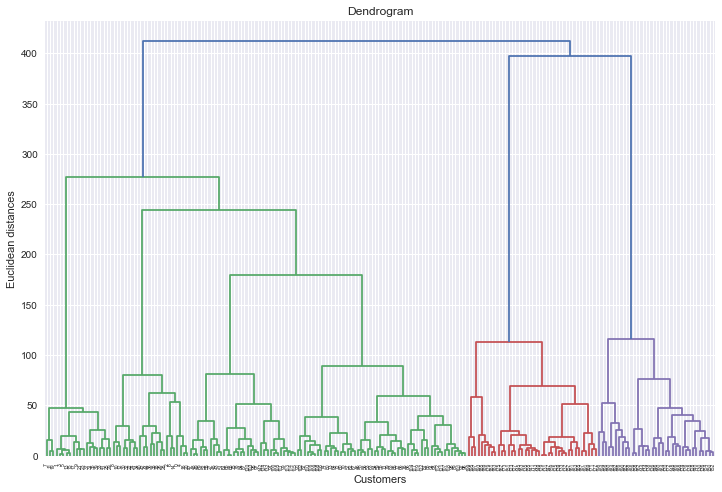

In [230]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(12,8))
dendrogram = sch.dendrogram(sch.linkage(X.iloc[:,:-2], method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [224]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
X['labels_HC'] = hc.fit_predict(X.iloc[:,:-1])

<AxesSubplot:xlabel='Income', ylabel='Score'>

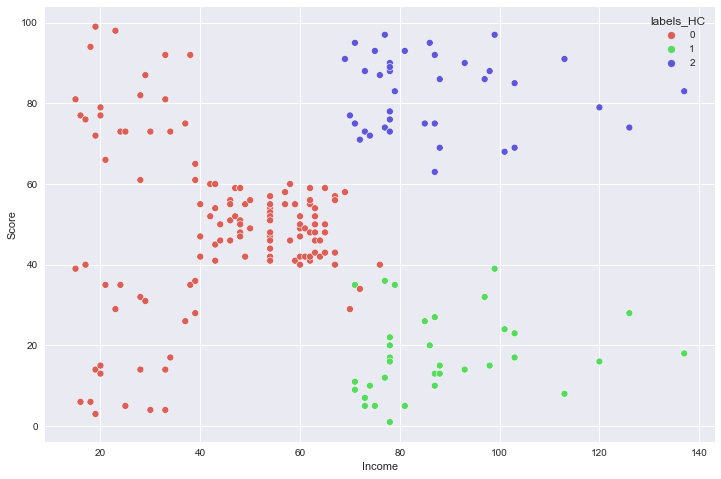

In [225]:
plt.figure(figsize=(12,8))
sns.scatterplot(X['Income'],X['Score'],hue=X['labels_HC'],palette=sns.color_palette('hls', 3))

In [226]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
X['labels_HC'] = hc.fit_predict(X.iloc[:,:-1])

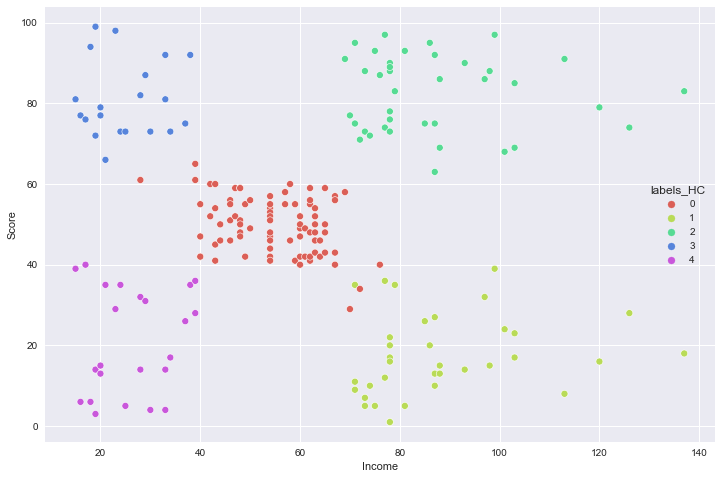

In [227]:
plt.figure(figsize=(12,8))
sns.scatterplot(X['Income'],X['Score'],hue=X['labels_HC'],palette=sns.color_palette('hls', 5))
plt.show()

In [ ]:
def visualize_silhouette(cluster_lists, X_features): 

    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        clusterer = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
   
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

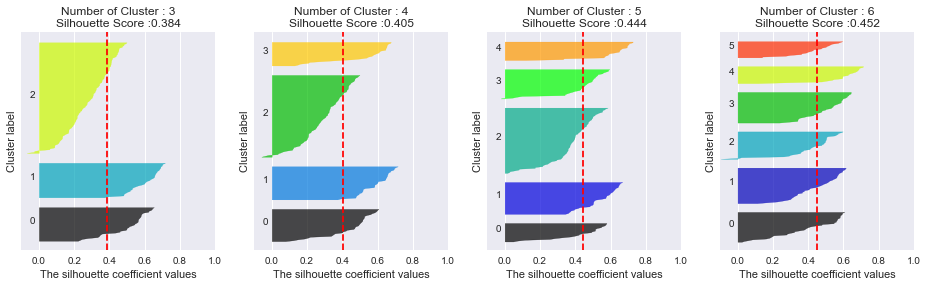

In [223]:
visualize_silhouette([3,4,5,6],X.iloc[:,:-2])

In [ ]:
We can observe very similar results from Hirarchical clustering also.  

## DBSCAN(Density Based Spatial Clustering of Applications with Noise)

Clustering Algorithms like kMeans and Hierarchical work on distance based similarity hence are prone to noise.

**DBSCAN** is one such algorithm which works on density based approach which tries to divide the space into Dense regions(high concentration of points within some specified distance) and Sparese regions/Noise.

**Parameters:** 

- epsilon: distance/radius using which a hypersphere is formed. Points coming in that region are called "Core Points"  
    
- min_samples: minimum no. of points which must be included to consider the region as a cluster     

**Types of Points:**

- Core Point: If a point P has >= min_samples in its epsilon radius, P shall be called a Core point
    
- Border Point: If a point P has (1 >= no. of points in epsilon radius < min_samples), P shall be called a Border Point
    
- Noise Point: A point neither a Core nor a Border point    

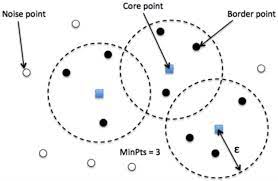

In [450]:
from IPython.display import Image
Image("C://Users//Hp//Desktop//dbscan.jpg")

In [128]:
X.iloc[:,:-1]

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


#### Finding Optimal number of epsilon

In [260]:
from sklearn.neighbors import NearestNeighbors

In [443]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X.iloc[:,:3])

In [444]:
distances, indices = nbrs.kneighbors(X.iloc[:,:3])

In [445]:
distances = np.sort(distances,axis=0)
distances = distances[:,1]

In [439]:
distances

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.73205081,
        1.73205081,  2.        ,  2.        ,  2.        ,  2.        ,
        2.23606798,  2.23606798,  2.23606798,  2.23606798,  2.23606798,
        2.23606798,  2.23606798,  2.44948974,  2.44948974,  2.44948974,
        2.44948974,  2.44948974,  2.44948974,  2.82842712,  2.82842712,
        2.82842712,  2.82842712,  3.        ,  3.        ,  3.        ,
        3.        ,  3.        ,  3.        ,  3.16227766,  3.16227766,
        3.16227766,  3.16227766,  3.31662479,  3.46410162,  3.46410162,
        3.60555128,  3.60555128,  3.60555128,  3.60555128,  3.60555128,
        3.60555128,  3.60555128,  3.74165739,  3.74165739,  3.74165739,
        3.74165739,  3.74165739,  3.74165739,  3.74165739,  3.74165739,
        4.12310563,  4.12310563,  4.12310563,  4.12310563,  4.12310563,
        4.12310563,  4.12310563,  4.12310563,  4.12310563,  4.12310563,
        4.24264069,  4.24264069,  4.24264069,  4.24264069,  4.35

In [435]:
distances

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.73205081,
        1.73205081,  2.        ,  2.        ,  2.        ,  2.        ,
        2.23606798,  2.23606798,  2.23606798,  2.23606798,  2.23606798,
        2.23606798,  2.23606798,  2.44948974,  2.44948974,  2.44948974,
        2.44948974,  2.44948974,  2.44948974,  2.82842712,  2.82842712,
        2.82842712,  2.82842712,  3.        ,  3.        ,  3.        ,
        3.        ,  3.        ,  3.        ,  3.16227766,  3.16227766,
        3.16227766,  3.16227766,  3.31662479,  3.46410162,  3.46410162,
        3.60555128,  3.60555128,  3.60555128,  3.60555128,  3.60555128,
        3.60555128,  3.60555128,  3.74165739,  3.74165739,  3.74165739,
        3.74165739,  3.74165739,  3.74165739,  3.74165739,  3.74165739,
        4.12310563,  4.12310563,  4.12310563,  4.12310563,  4.12310563,
        4.12310563,  4.12310563,  4.12310563,  4.12310563,  4.12310563,
        4.24264069,  4.24264069,  4.24264069,  4.24264069,  4.35

In [431]:
distances

array([ 1.        ,  1.        ,  1.        ,  1.        ,  1.73205081,
        1.73205081,  2.        ,  2.        ,  2.        ,  2.        ,
        2.23606798,  2.23606798,  2.23606798,  2.23606798,  2.23606798,
        2.23606798,  2.23606798,  2.44948974,  2.44948974,  2.44948974,
        2.44948974,  2.44948974,  2.44948974,  2.82842712,  2.82842712,
        2.82842712,  2.82842712,  3.        ,  3.        ,  3.        ,
        3.        ,  3.        ,  3.        ,  3.16227766,  3.16227766,
        3.16227766,  3.16227766,  3.31662479,  3.46410162,  3.46410162,
        3.60555128,  3.60555128,  3.60555128,  3.60555128,  3.60555128,
        3.60555128,  3.60555128,  3.74165739,  3.74165739,  3.74165739,
        3.74165739,  3.74165739,  3.74165739,  3.74165739,  3.74165739,
        4.12310563,  4.12310563,  4.12310563,  4.12310563,  4.12310563,
        4.12310563,  4.12310563,  4.12310563,  4.12310563,  4.12310563,
        4.24264069,  4.24264069,  4.24264069,  4.24264069,  4.35

In [430]:
len(distances)

200

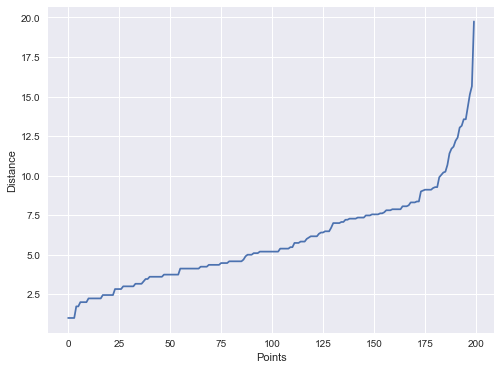

In [270]:
figure = plt.figure(figsize=(8,6))
plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance')
plt.show()


In [419]:
X

,Age,Income,Score,labels_KMeans,labels_HC,labels_DBSCAN
0,19,15,39,3,4,0
1,21,15,81,1,3,0
2,20,16,6,3,4,0
3,23,16,77,1,3,0
4,31,17,40,3,4,0
...,...,...,...,...,...,...
195,35,120,79,4,2,0
196,45,126,28,2,1,0
197,32,126,74,4,2,0
198,32,137,18,2,1,0


In [346]:
from sklearn.cluster import DBSCAN
X['labels_DBSCAN'] = model_db.labels_.astype(object)+1  #+1 bcaz its starting from -1

In [347]:
 model_db.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1,  0,
       -1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1,  2,  2,  2, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [352]:
from sklearn.metrics import silhouette_score
silhouette_score(X.iloc[:,:3],model_db.labels_.astype(object)+1)
                
                
                
                
                
                

AttributeError: 'DBSCAN' object has no attribute 'labels_'

In [339]:
epsilon = list(range(3,20))

In [341]:
samples = list(range(3,20))

In [342]:
best_silhouette_score = 0
best_epsilon = 0
best_min_samples = 0
count = 0

In [349]:
sil_score = silhouette_score(X.iloc[:,:3],model_db.labels_)

AttributeError: 'DBSCAN' object has no attribute 'labels_'

In [348]:
for i in epsilon:
    for j in samples:
        model_db = DBSCAN(eps=epsilon, min_samples=samples, metric='euclidean')
        model_db.fit(X.iloc[:,:3])
        sil_score = silhouette_score(X.iloc[:,:3],model_db.labels_)
        if sil_score > best_silhouette_score:
            best_silhouette_score = sil_score
            best_epsilon = i
            best_min_sample = j
            count += count
            
            print('best_silhouette_score = {}'.format(best_silhouette_score) ,
            'best_epsilon = {}'.format(best_epsilon),
            'best_min_sample = {}'.format(best_min_sample),
     'count = {}'.format(count))        
        

TypeError: '>' not supported between instances of 'list' and 'float'

In [ ]:
**Observations:**
    
On trying different combinations for DBSCSN  

In [320]:
import plotly.express as px
fig = px.scatter(X, x="Income", y="Score", color="labels_DBSCAN")
fig.show()

In [69]:
500//3

166